# Análise de Dados Abertos


In [120]:
import pandas as pd
import numpy as np
from babel.numbers import format_compact_currency
import matplotlib.pyplot as plt
import locale
import tabulate

locale.setlocale(locale.LC_ALL, "pt_BR")
plt.style.use("default")
excelsheet = "../data/criptoativos_dados_abertos_07082023.xls"

# Carrega a planilha excel
with pd.ExcelFile(excelsheet) as xls:
    df1 = pd.read_excel(
        xls,
        "Relatorio1",
        skiprows=9,
        decimal=",",
        parse_dates=[0],
        date_format="%B de %Y",
        usecols=[0, 3, 6, 7, 8],
    )
    df2 = pd.read_excel(
        xls,
        "Relatorio2",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        decimal=".",
    )
    df3 = pd.read_excel(
        xls,
        "Relatório3",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        header=[0, 1],
    )
    df4 = pd.read_excel(
        xls,
        "Relatorio4",
        skiprows=13,
        decimal=",",
        parse_dates=[1],
        date_format="%B de %Y",
    )


# Utilitários
def format_cols(data):
    for i in data.columns:
        if data[i].dtype == np.float64:
            data[i] = data[i].apply(
                lambda x: format_compact_currency(
                    x, currency="BRL", locale="pt_BR", fraction_digits=2
                )
            )

## Total de Valores Declarados por Ano


In [132]:
# Renderiza Relatório1
df1 = df1.rename(
    columns={
        "Unnamed: 0": "Ano",
        "Subtotal": "Exchanges no Exterior",
        "Subtotal.1": "Sem Exchanges",
        "Somente PJ": "Exchanges",
        "Unnamed: 8": "Total",
    }
)

df1_new = df1.groupby(pd.Grouper(key=df1.columns[0], freq="Y")).sum()
format_cols(df1_new)
#TODO usar um heightmap
df1_new

,Exchanges no Exterior,Sem Exchanges,Exchanges,Total
Ano,,,,
2019-12-31,"R$ 6,51 mil","R$ 7,12 mil","R$ 14,25 mil","R$ 27,89 mil"
2020-12-31,"R$ 27,73 mil","R$ 14,96 mil","R$ 49,38 mil","R$ 92,07 mil"
2021-12-31,"R$ 21,43 mil","R$ 33,2 mil","R$ 152,03 mil","R$ 206,65 mil"
2022-12-31,"R$ 14,64 mil","R$ 29,01 mil","R$ 123,04 mil","R$ 166,69 mil"
2023-12-31,"R$ 12,03 mil","R$ 14,71 mil","R$ 83,87 mil","R$ 110,6 mil"


## Quantidade de CPF/CNPJ Únicos


In [122]:
# Renderiza Relatório2
df2_new = df2.groupby(pd.Grouper(key=df2.columns[0], freq="Y")).sum()
df2_new

,CNPJ,CPF
MÊS/ANO,,
2019-12-31,12121,680054
2020-12-31,37611,1500287
2021-12-31,78290,6030838
2022-12-31,406008,11868506
2023-12-31,409524,11432616


## Operações por gênero


Text(0, 0.5, 'Valor de Operações(%)')

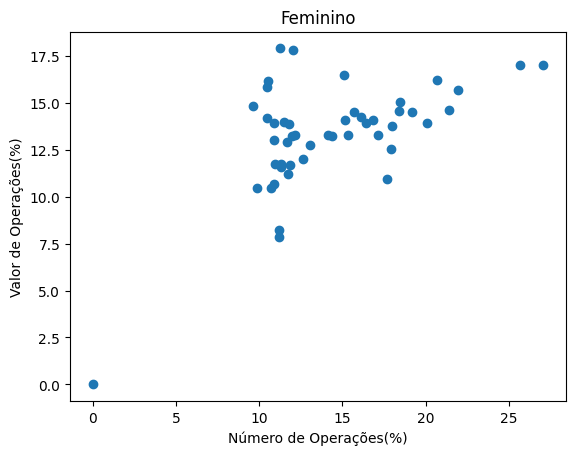

In [123]:
# Renderiza Relatório3, parte 1
# Não vai ser possível unir os dados, já que são porcentagens!
# df3.info()
plt.scatter(df3["% Nº Operações",'Feminino'],df3['% Valor Operações', 'Feminino'])
plt.title('Feminino')
plt.xlabel("Número de Operações(%)")
plt.ylabel("Valor de Operações(%)")

Text(0, 0.5, 'Valor de Operações(%)')

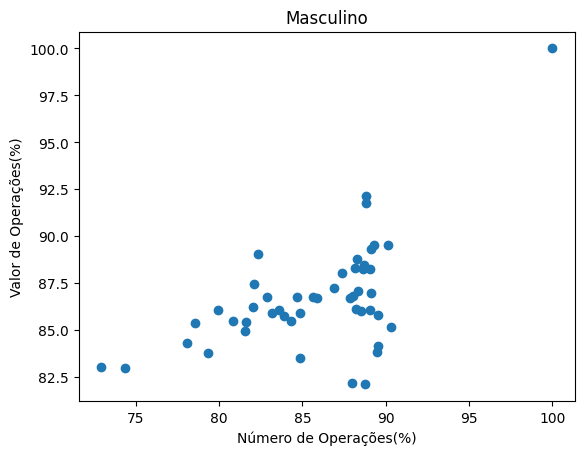

In [124]:
plt.scatter(df3["% Nº Operações",'Masculino'],df3['% Valor Operações', 'Masculino'],)
plt.title('Masculino')
plt.xlabel("Número de Operações(%)")
plt.ylabel("Valor de Operações(%)")

## Criptoativos Declarados


In [126]:
# Renderiza Relatório 4
# https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
# df4.info()
df4_new = df4.groupby(["CRIPTOATIVO", "MÊS/ANO"])["VALOR TOTAL DAS OPERAÇÕES"].sum()
df4_new.head()

<class 'pandas.core.series.Series'>
MultiIndex: 2485 entries, ('AAVE', Timestamp('2020-08-01 00:00:00')) to ('ZRX', Timestamp('2023-06-01 00:00:00'))
Series name: VALOR TOTAL DAS OPERAÇÕES
Non-Null Count  Dtype  
--------------  -----  
2485 non-null   float64
dtypes: float64(1)
memory usage: 25.3+ KB
